In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
df1 = pd.read_csv("test.csv")
df2 = pd.read_csv("train.csv")

df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

https://www.kaggle.com/competitions/titanic/data?select=test.csv

In [9]:
df = pd.concat([df1,df2])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


ValueError: cannot set using a list-like indexer with a different length than the value

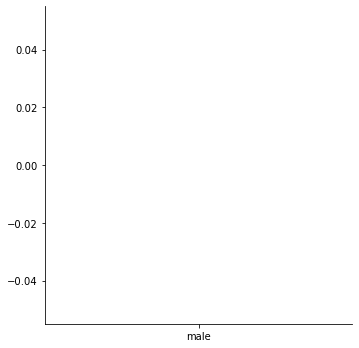

In [14]:
sns.relplot(
    data=df,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)


# we don't have 418 survival values that's why we have to analysis training data only

In [15]:
print(len(df2))
df2.head(1)

891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

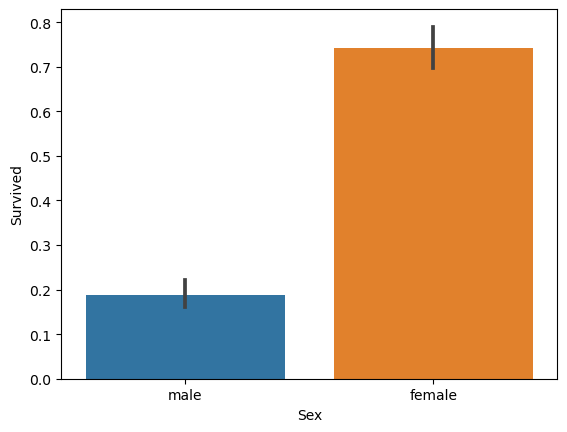

In [26]:
sns.barplot(
    data=df2,
    x="Sex", y="Survived",
)

In [21]:
df2.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:>

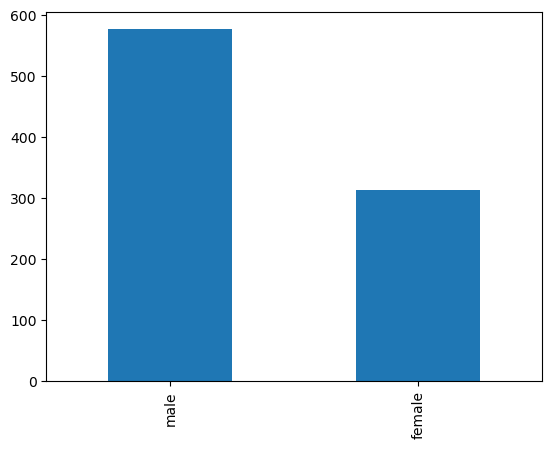

In [23]:
df2.Sex.value_counts().plot(kind='bar')

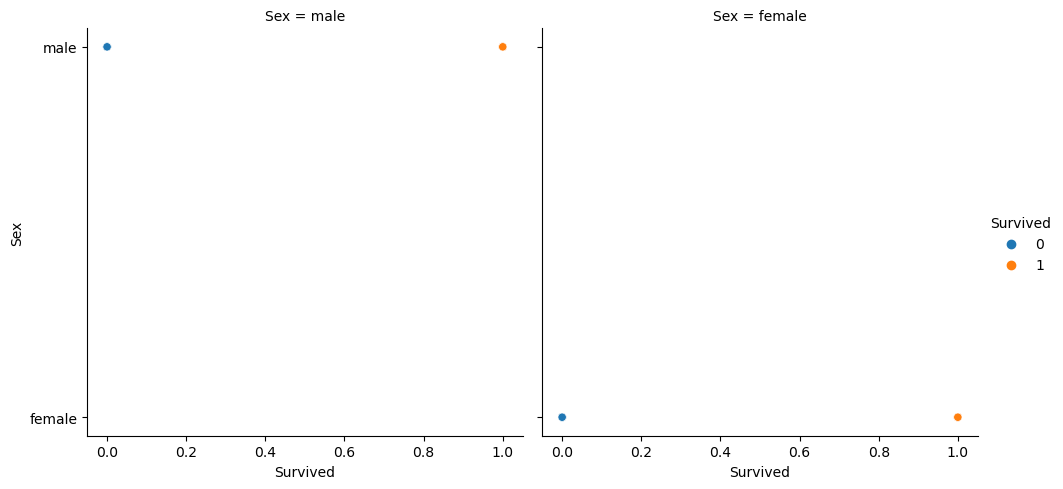

In [35]:
sns.relplot(
    data=df2,
    x="Survived", y="Sex",
    col='Sex', hue="Survived"
)

In [36]:
df2.groupby(["Sex","Survived"]).agg(['count'])

PassengerId Pclass  Name   Age SibSp Parch Ticket  Fare Cabin  \
                      count  count count count count count  count count count   
Sex    Survived                                                                 
female 0                 81     81    81    64    81    81     81    81     6   
       1                233    233   233   197   233   233    233   233    91   
male   0                468    468   468   360   468   468    468   468    62   
       1                109    109   109    93   109   109    109   109    45   

                Embarked  
                   count  
Sex    Survived           
female 0              81  
       1             231  
male   0             468  
       1             109

In [37]:
df2.groupby(["Sex","Survived"]).agg(['count'])[["PassengerId"]]

PassengerId
                      count
Sex    Survived            
female 0                 81
       1                233
male   0                468
       1                109

In [38]:
df2.groupby(["Sex","Survived"])[["PassengerId"]].agg(['count'])

PassengerId
                      count
Sex    Survived            
female 0                 81
       1                233
male   0                468
       1                109

<AxesSubplot:xlabel='Sex,Survived'>

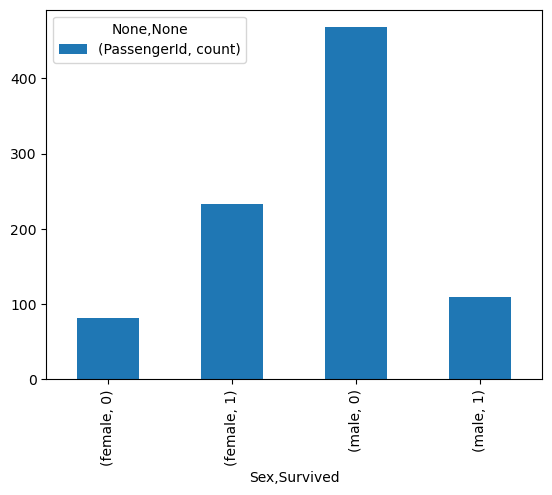

In [39]:
df2.groupby(["Sex","Survived"])[["PassengerId"]].agg(['count']).plot(kind='bar')

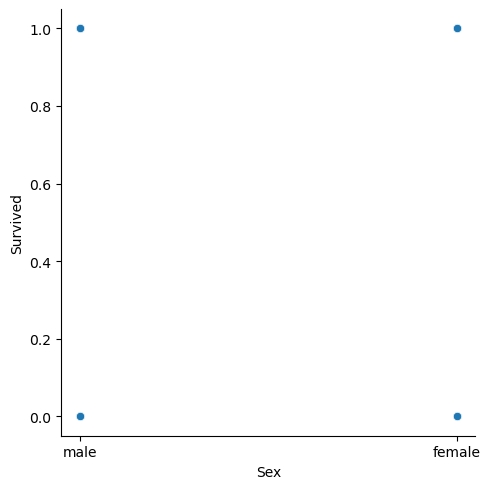

In [62]:
sns.relplot(
    data=df2,
    x = "Sex",y="Survived"
)

<AxesSubplot:xlabel='Survived', ylabel='count'>

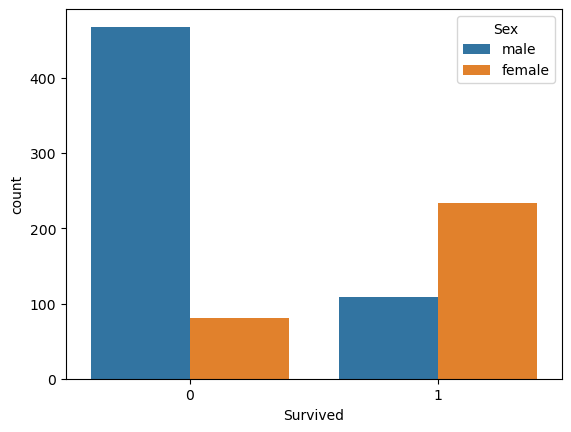

In [64]:
sns.countplot(
    data=df2,
    x = "Survived",
    hue= "Sex"
)